<a href="https://colab.research.google.com/github/KOGASA0X/CPC251_Assignment/blob/main/CPC251_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                             School of Computer Sciences

                                Universiti Sains Malaysia

                        Academic Session 2024/2025, Semester 2
                    CPC251 MACHINE LEARNING AND COMPUTATIONAL INTELLIGENCE
                                    ASSIGNMENT I
                           Lecturer:Dr. Mohd Halim Mohd Noor
                             Submission Date:13 May 2024



#### Group Information

Group No: Climate6

- Member 1: AZAM TAMHEED
- Member 2: MUEED HYDER MIR
- Member 3: MUHAMMAD HADIF HAIQAL BIN HADLI
- Member 4: ZHANG, YUBIAO

#### Import Libraries

In [231]:
#%config Completer.use_jedi=False
#import all necessary libraries
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

#### Load the dataset

In [232]:
df = pd.read_csv('classification_dataset.csv')
df.sample(10)

,f1,f2,f3,f4,f5,label
946,-1.061491,1.044824,16.155682,-8.798228,-0.881289,0
409,-4.814073,4.347387,6.737012,12.732956,6.889288,1
913,-11.048994,6.139309,6.877816,-4.185473,5.645072,0
575,-4.393519,9.354404,-0.852408,-8.418432,10.270078,0
505,-8.362895,1.274688,10.529544,9.757067,11.522673,1
576,-3.283432,7.921961,12.588695,-2.673428,4.926287,0
953,5.290627,4.587922,4.607114,10.161200,4.496489,1
103,2.431025,7.344819,-2.946966,-9.128363,9.425408,0
761,-1.721196,3.856299,10.963237,9.357931,8.310320,1
368,-6.085463,-2.865236,4.545722,8.533789,5.152932,1


#### Define the loss function

In [233]:
def loss_fn(y_true, y_pred):
    # Reshape the labels and predictions to column vectors
    y_true = tf.reshape(y_true, [-1, 1])
    y_pred = tf.reshape(y_pred, [-1, 1])
    # now  Calculate and return the mean sigmoid cross entropy loss
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels=y_true))


#### Define function to perform prediction

In [234]:
#apply the sigmoid function to x
def sigmoid(x):
    return tf.sigmoid(x)

#apply the RELU functtion to x
def relu(x):
    return tf.maximum(x, 0)


def forward(x, weights, biases):
    z1 = tf.add(tf.matmul(x, weights['h']), biases['b1'])
    a1 = relu(z1) # apply the relu function to hidden layer
    z2 = tf.add(tf.matmul(a1, weights['out']), biases['out'])
    return z2

#### Define function for model training
Display the training and validation loss values for each epoch of the training loop. The displayed value must be in 6 decimal places.<br>
Hint: <br>
Use `tf.GradientTape` to compute the gradients.

In [235]:
def train(X, y, weights, biases, learning_rate):
    # Use tf.GradientTape() to record operations for automatic differentiation.


    with tf.GradientTape() as tape:
        # Call the forward function calculating
        # the predicted outputs of the network for the current batch of data.
        y_pred = forward(X, weights, biases)
        # Calculate the loss between the actual labels (y) and predictions (y_pred).

        loss = loss_fn(y, y_pred)

    # Use the tape to compute gradients of the loss
    gradients = tape.gradient(loss, [weights['h'], weights['out'], biases['b1'], biases['out']])

    # Update the model weights and biases using the calculated gradients.

    weights['h'].assign_sub(learning_rate * gradients[0])
    weights['out'].assign_sub(learning_rate * gradients[1])
    biases['b1'].assign_sub(learning_rate * gradients[2])
    biases['out'].assign_sub(learning_rate * gradients[3])

    # Return the loss computed
    return loss



#initialise history dictionary
def fit(x_train, y_train, x_val, y_val, x_test, y_test, weights, biases, epochs, learning_rate, batch_size=None):
    history = {'train_loss': [], 'val_loss': [], 'test_loss': []}

    if batch_size is None:
        batch_size = x_train.shape[0]  # Full-batch training
    num_batches = int(np.ceil(x_train.shape[0] / batch_size))

#training loop for the numbers of epochs specified
    for epoch in range(epochs):
        epoch_loss = 0
        #mini batch
        for batch_index in range(num_batches):
            batch_start = batch_index * batch_size
            batch_end = min(batch_start + batch_size, x_train.shape[0])
            x_batch = x_train[batch_start:batch_end]
            y_batch = y_train[batch_start:batch_end]
            #train on batch and get loss
            batch_loss = train(x_batch, y_batch, weights, biases, learning_rate)
            epoch_loss += batch_loss.numpy()


#average loss
        epoch_loss /= num_batches
        history['train_loss'].append(epoch_loss)

        # Validation Loss
        val_pred = forward(x_val, weights, biases)
        val_loss = loss_fn(y_val, val_pred)
        history['val_loss'].append(val_loss.numpy())

        # Test Loss
        test_pred = forward(x_test, weights, biases)
        test_loss = loss_fn(y_test, test_pred)
        history['test_loss'].append(test_loss.numpy())

        print(f'Epoch {epoch+1}, Train Loss: {epoch_loss}, Val Loss: {val_loss.numpy()}, Test Loss: {test_loss.numpy()}')

    return history


#### Define the tensors to hold the weights and biases (create the model)
Hint: <br>
Use `tf.Variable` to create the tensors.<br>
Put the tensors in a list.

In [236]:
input_size = 5 # number of features (f1	f2	f3	f4	f5)
hidden_size = 10 # number of neurons in the hidden layer
output_size = 1 # binary classification

weights = {
    'h': tf.Variable(tf.random.normal([input_size, hidden_size], dtype=tf.float64)),
    'out': tf.Variable(tf.random.normal([hidden_size, output_size], dtype=tf.float64))
}
# initialising biases
biases = {
    'b1': tf.Variable(tf.random.normal([hidden_size], dtype=tf.float64)),
    'out': tf.Variable(tf.random.normal([output_size], dtype=tf.float64))
}


#### Split the dataset
The ratio of training and test is 7:1:2.

In [237]:
y = df['label']
X = df.drop(columns=['label']).values # drop price and convert to numpy array
y = y.values # convert to numpy array
print(X.shape)
print(y.shape)

seed_num = 42  # Using a fixed seed for reproducibility

# Splitting data into training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num)

# Further splitting training data into training and validation sets (70% training, 15% validation)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=seed_num)

# Printing shapes of the splits
print("Training set shapes:")
print(X_train.shape)
print(y_train.shape)

print("\nValidation set shapes:")
print(X_val.shape)
print(y_val.shape)

print("\nTest set shapes:")
print(X_test.shape)
print(y_test.shape)
#cast training to float64
X_train = tf.cast(X_train, tf.float64)
y_train = tf.cast(y_train, tf.float64)
X_val = tf.cast(X_val, tf.float64)
y_val = tf.cast(y_val, tf.float64)
X_test = tf.cast(X_test, tf.float64)
y_test = tf.cast(y_test, tf.float64)


(1000, 5)
(1000,)
Training set shapes:
(700, 5)
(700,)

Validation set shapes:
(100, 5)
(100,)

Test set shapes:
(200, 5)
(200,)


#### Normalize the data

In [238]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)
X_vald = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Print the first five rows of each dataset
print("First five rows of X_train:")
print(X_train[:5])

print("\nFirst five rows of X_vald (validation set):")
print(X_vald[:5])

print("\nFirst five rows of X_test:")
print(X_test[:5])

First five rows of X_train:
[[-0.30862009  1.73633873 -0.54617521 -1.40212322  1.50921555]
 [ 0.9654205   0.18504751  0.71275703  1.50488119 -0.36517122]
 [-1.64940099  1.12708821 -0.89683306 -0.71355991  0.87133282]
 [-1.01448595 -0.29597115  0.5875384   0.81855965  1.45268112]
 [-0.48516687 -0.99146083 -0.58626376  1.27840301 -1.39181021]]

First five rows of X_vald (validation set):
[[ 1.70615296 -0.27509278  1.11734278  0.9485441  -0.37665605]
 [-1.45684648 -0.91357976 -0.46527879  0.51412151  0.76533131]
 [-0.32046422 -0.13542697  1.11941925  0.80634604  0.42593299]
 [ 0.49951525  0.80270316 -0.40498249 -0.58460573  0.31303596]
 [ 0.70146495  0.0172996   0.58841737 -0.94947164 -1.02256425]]

First five rows of X_test:
[[ 1.40782537 -0.87529318 -0.10374545  1.06761466 -0.74705924]
 [-0.11680952 -0.35992692  1.02053366  0.27115266 -1.68572348]
 [ 0.11085255 -0.0751017   1.71146636  0.09432908 -1.6363604 ]
 [ 1.77295172  0.12799389  1.68145856  1.69338922 -2.49776163]
 [-0.87596014 -

#### Train the model

In [239]:
# Define hyperparameters
learning_rate = 0.01
epochs = 300
batch_size = None  # Full-batch training

In [240]:
# Train the model
history = fit(X_train, y_train, X_val, y_val, X_test, y_test, weights, biases, epochs, learning_rate, batch_size)


Epoch 1, Train Loss: 3.227564693221653, Val Loss: 21.243434308123398, Test Loss: 3.3057219106012816
Epoch 2, Train Loss: 3.176982767212477, Val Loss: 20.913873985613694, Test Loss: 3.2541158089818607
Epoch 3, Train Loss: 3.126912489029623, Val Loss: 20.58711375464281, Test Loss: 3.203017960524995
Epoch 4, Train Loss: 3.0773545813281817, Val Loss: 20.263260405369763, Test Loss: 3.152439879317031
Epoch 5, Train Loss: 3.0283177829166052, Val Loss: 19.94187945062871, Test Loss: 3.102359260981997
Epoch 6, Train Loss: 2.97979458926921, Val Loss: 19.622939773482493, Test Loss: 3.052791260843328
Epoch 7, Train Loss: 2.931785924166462, Val Loss: 19.30640224022393, Test Loss: 3.003711648290893
Epoch 8, Train Loss: 2.884273765814288, Val Loss: 18.992324768575095, Test Loss: 2.955128124573465
Epoch 9, Train Loss: 2.8372637322581795, Val Loss: 18.680590613354614, Test Loss: 2.907032787108443
Epoch 10, Train Loss: 2.7907412522496107, Val Loss: 18.37117921102257, Test Loss: 2.8594140600633513
Epoch 1

#### Display the training loss and validation loss against epoch graph

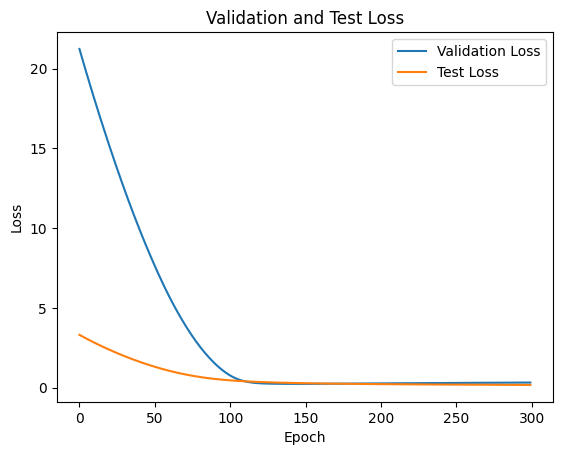

In [241]:
import matplotlib.pyplot as plt


# Plot the validation and test loss over epochs
plt.plot(history['val_loss'], label='Validation Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation and Test Loss')
plt.legend()
plt.xticks(ticks=[0, 50, 100, 150, 200,250,300])
plt.show()


#### Predict the test set

In [242]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf


def predict(X, weights, biases):
  #calculate logits using forward pass

    logits = forward(X, weights, biases)
   #apply sigmoid to logits
    return tf.round(tf.sigmoid(logits))


y_pred = predict(X_test, weights, biases).numpy()
#print predicted labels
print(y_pred)


[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.

#### Display the confusion matrix and the classification report.

In [243]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report
cr = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(cr)


Confusion Matrix:
[[95  5]
 [ 3 97]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.95      0.96       100
     Class 1       0.95      0.97      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

